# mask_5x

In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


src = '/media/ldy/7E1CA94545711AE6/OSCC/filter_5x_v3#/filtered_mask'
size_list = []

for s in os.listdir(src):
    img = Image.open(os.path.join(src, s))
    w, h = img.size
    size_list.append((w, h))

/home/ldy/anaconda3/envs/pytorch/lib/python3.6/site-packages/PIL/Image.py:2735: DecompressionBombWarning: Image size (125499114 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/ldy/anaconda3/envs/pytorch/lib/python3.6/site-packages/PIL/Image.py:2735: DecompressionBombWarning: Image size (109099119 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/ldy/anaconda3/envs/pytorch/lib/python3.6/site-packages/PIL/Image.py:2735: DecompressionBombWarning: Image size (115977342 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/ldy/anaconda3/envs/pytorch/lib/python3.6/site-packages/PIL/Image.py:2735: DecompressionBombWarning: Image size (104849220 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


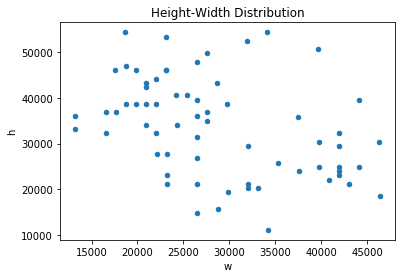

In [10]:
x_list = [c[0]*4 for c in size_list]
y_list = [c[1]*4 for c in size_list]

plt.figure()
plt.scatter(x_list, y_list, s=20, marker='o')
plt.xlabel('w')
plt.ylabel('h')
plt.title('Height-Width Distribution')
plt.show()

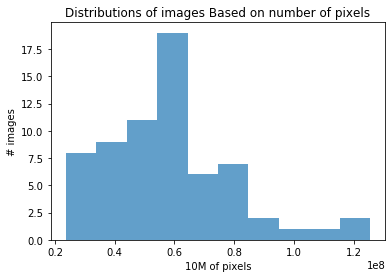

In [8]:
p_list = [c[0]*c[1] for c in size_list]
plt.hist(p_list, bins=10, alpha=0.7)
plt.ylabel('# images')
plt.xlabel('10M of pixels')
plt.title('Distributions of images Based on number of pixels')
plt.show()

In [7]:
num = 0

for size in size_list:
    num += (size//512) ** 2

In [8]:
num

17491.0

# train & val split

In [10]:
import json
from random import shuffle


src = '/media/ldy/7E1CA94545711AE6/OSCC/mask_x8/std_mask'
save_dir = '/media/ldy/7E1CA94545711AE6/OSCC/meta/train_val.json'
content = dict()

slide_list = [c.split('.')[0] for c in os.listdir(src)]
shuffle(slide_list)
content['train'] = slide_list[:60]
content['val'] = slide_list[60:]

with open(save_dir, 'w') as f:
    json.dump(content, f)

# mean & std

In [1]:
import numpy as np
import cv2
import os
from tqdm import tqdm_notebook as tqdm

imgs_path = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/cls_8x/train'
 
len_ = 0
mean_list = [0, 0, 0]
std_list = [0, 0, 0]
for slide in tqdm(os.listdir(imgs_path)):
    slide_dir = os.path.join(imgs_path, slide)
    for item in os.listdir(slide_dir):
        item_path = os.path.join(slide_dir, item)
        img = cv2.imread(item_path) / 255.0
        len_ += 1
    
        for i in range(3):
            mean_list[i] += img[:, :, i].mean()
            std_list[i] += img[:, :, i].std()
#         print(mean_list, std_list)
    


In [8]:
import numpy as np
import cv2
import os
from tqdm import tqdm_notebook as tqdm

imgs_path = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/cls_8x/train'
 
len_ = 0
mean_list = [0, 0, 0]
std_list = [0, 0, 0]
for slide in tqdm(os.listdir(imgs_path)):
    slide_dir = os.path.join(imgs_path, slide)
    for item in os.listdir(slide_dir):
        item_path = os.path.join(slide_dir, item)
        img = cv2.imread(item_path) / 255.0
#         print(img)
        
        len_ += 1
    
        for i in range(3):
            mean_list[i] += img[:, :, i].mean()
            std_list[i] += img[:, :, i].std()
        print(mean_list, std_list)
        assert 1==2
    


[0.8405069840436176, 0.6209725296368548, 0.7977030656012407] [0.08945582263750403, 0.2282086633141772, 0.12547100153982244]



AssertionError: 

In [9]:
means = [c/len_ for c in mean_list]
stds =[c/len_ for c in std_list]

means.reverse()
stds.reverse()
 
print("normMean = {}".format(means))
print("normStd = {}".format(stds))

normMean = [0.7977030656012407, 0.6209725296368548, 0.8405069840436176]
normStd = [0.12547100153982244, 0.2282086633141772, 0.08945582263750403]


In [11]:
from PIL import Image

new = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/cls_8x/train/_20190403080921/_20190403080921_1_12_1_.png'

img = np.array(Image.open(new)) / 255.0

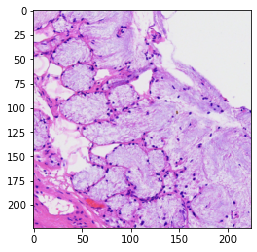

In [20]:
plt.imshow(img)
plt.show()

In [23]:
std_img = (img - np.array(means)) / np.array(stds)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


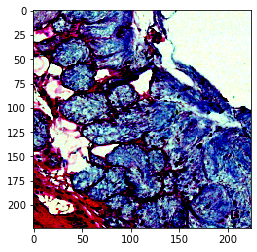

In [24]:
import matplotlib.pyplot as plt

r_img = np.array(std_img * 255, dtype='uint8') 

plt.imshow(std_img)
plt.show()